# MILESTONE 1

#### Query yang digunakan untuk mendapatkan dataset:

```
SELECT limit_balance, sex, education_level, marital_status, age,
      pay_0, pay_2, pay_3, pay_4, pay_5, pay_6,
      bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6,
      pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
      default_payment_next_month

FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 3998
```

## i. Perkenalan

Nama : Jovanca Stevani Tanjung

Batch 002 HCK

---

Objective:
- be able to get the dataset from Google BigQuery
- be able to understand supervised learning concept
- be able to implementate the data using supervised learning
- be able to do model evaluation

## ii. Import Libraries

Importing libraries that's going to be used in this project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from feature_engine.outliers import Winsorizer

from time import time
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## iii. Data Loading

Load the dataset from local path and display the data

In [2]:
df = pd.read_csv("D:\Hacktiv8\Phase 1\Milestone 1\p1---ftds-002-hck--m1-jovancast\h8dsft_P1M1_jovanca_stevani.csv")
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0


In [3]:
#Showing the first 5 data from the dataset
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0


In [4]:
#Showing the last 5 data from the dataset
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0
2964,100000,2,1,2,28,0,0,0,2,0,...,10775,10998,12655,1300,3005,0,700,2000,1500,0


In [5]:
#Checking the information about each columns from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

In [6]:
#Generate and checking the descriptive statistic from the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


#### Data Cleaning

In [7]:
#Checking if there is duplicated data
df.duplicated().any()

True

After checking, there is duplicated data from the dataset showed from the result which is True.

In [8]:
df[df.duplicated() == True]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1754,200000,2,1,1,34,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


As we can see, there is one duplicated data which is in row 1754. And I am going to drop the duplicated data from the dataset, because two exact same data value can be represented by one of it. And also datasets that contain duplicates may contaminate the training data with the test data or vice versa.

In [9]:
#Dropping the duplicated data
df.drop([1754], inplace=True)

In [10]:
df.duplicated().any()

False

After dropping the duplicated data in row 1754, there is no duplicated data anymore. Which means we can analyze the data further more.

In [11]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

From the result above, we can tell that there is no missing value from the dataset.

In [12]:
df.rename(columns={'default_payment_next_month':'default_payment', 'pay_0':'pay_1'}, inplace=True)
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment'],
      dtype='object')

If we pay attention closer to the columns on the dataset, there is no pay_1. so after pay_0, it's pay_2. In this case, I will just rename pay_0 to pay_1 to make the data be more ordered. and I also changed the 'default_payment_next_month' column name to 'default_payment' for better convinience.

---

#### Checking the Categorical Value from Each Categorical Columns

##### sex:
- 1 = male
- 2 = female

In [13]:
df['sex'].value_counts()

2    1801
1    1163
Name: sex, dtype: int64

The data divided correctly and showed there are 1801 female and 1163 male.

##### education_level:
- 1 = graduate school
- 2 = university
- 3 = high school
- 4 = others

In [14]:
df['education_level'].value_counts()

2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

As we can see in dataset we have values like 5, 6, 0 as well, which we have no description about, so we can add them to category 4, which is Others.

In [15]:
edu = (df['education_level'] == 5) | (df['education_level'] == 6) | (df['education_level'] == 0)
df.loc[edu, 'education_level'] = 4
df['education_level'].value_counts()

2    1400
1    1038
3     483
4      43
Name: education_level, dtype: int64

Now as we can see, the data category divide looks more organized.

#### marital_status:
- 1 = married
- 2 = single
- 3 = others

In [16]:
df['marital_status'].value_counts()

2    1594
1    1331
3      35
0       4
Name: marital_status, dtype: int64

After seeing the value of 'marital_status' column, there is value 0 which is not determined. So, might as well I am going to add the value to value 3 which is Others.

In [17]:
mar = df['marital_status'] == 0
df.loc[mar, 'marital_status'] = 3
df['marital_status'].value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

#### pay_1 - pay_6

Now I am going to check the value of repayment status, from pay_1 until pay_6. From the columns description about repayment status, we can see the meaning of each value.


pay_1 until pay_6 = Repayment status
- -1 = pay duly
- 1 = payment delay for one month
- 2 = payment delay for two months

    ...

- 9 = payment delay for nine months and above

In [18]:
df_pay = df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

In [19]:
for i in df_pay.columns.tolist():
    print(i, '\n')
    print(df_pay[i].value_counts())
    print('-'*30)

pay_1 

 0    1516
-1     540
 1     355
 2     262
-2     247
 3      29
 4       7
 8       3
 5       2
 7       2
 6       1
Name: pay_1, dtype: int64
------------------------------
pay_2 

 0    1607
-1     580
 2     374
-2     352
 3      32
 4       8
 1       4
 7       3
 6       2
 5       2
Name: pay_2, dtype: int64
------------------------------
pay_3 

 0    1610
-1     580
 2     368
-2     366
 3      22
 4       8
 6       4
 5       3
 7       3
Name: pay_3, dtype: int64
------------------------------
pay_4 

 0    1667
-1     532
-2     407
 2     324
 3      14
 4       7
 7       6
 5       5
 6       1
 8       1
Name: pay_4, dtype: int64
------------------------------
pay_5 

 0    1702
-1     504
-2     440
 2     280
 3      19
 4       9
 7       7
 5       2
 6       1
Name: pay_5, dtype: int64
------------------------------
pay_6 

 0    1626
-1     540
-2     469
 2     297
 3      21
 7       6
 6       3
 4       2
Name: pay_6, dtype: int64
--------------

It is seen that there is value -2 and 0 which is not defined in the description. So, to make the data easier to analyze, I will group certain values to be the same value.

In this case, I will add value -1 and -2 to the value 0. So value 0, -1 and -2 will be considered as 'pay duly'.

And, I will gather all the values that is more than 2, to the value 3, which means value 3 is payment delay for more than 2 months.

In [20]:
for i in df_pay:
    edu = (df_pay[i] == -1) | (df_pay[i] == -2)
    df_pay.loc[edu, i] = 0
    
    edu = (df_pay[i] == 4) | (df_pay[i] == 5) | (df_pay[i] == 6) | (df_pay[i] == 7) | (df_pay[i] == 8)
    df_pay.loc[edu, i] = 3

    print(df_pay[i].value_counts())
    print('-'*30)

0    2303
1     355
2     262
3      44
Name: pay_1, dtype: int64
------------------------------
0    2539
2     374
3      47
1       4
Name: pay_2, dtype: int64
------------------------------
0    2556
2     368
3      40
Name: pay_3, dtype: int64
------------------------------
0    2606
2     324
3      34
Name: pay_4, dtype: int64
------------------------------
0    2646
2     280
3      38
Name: pay_5, dtype: int64
------------------------------
0    2635
2     297
3      32
Name: pay_6, dtype: int64
------------------------------


After reducing the unique value in repayment status, it feels more convenient to observe and analyze repayment status columns. So that now the values are changed, it means the value descriptions are also changed.

- 0 = pay duly
- 1 = repayment delay for one month
- 2 = repayment delay for two months
- 3 = repayment delay for more than two months

In [21]:
df.drop(['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'], axis=1, inplace=True)

I am going to replace the repayment status old columns to the new repayment status column which is df_pay. But before I do that, I have to drop the old columns of repayment status.

In [22]:
df = pd.concat([df.reset_index(drop=True),df_pay.reset_index(drop=True)], axis=1)
df.head()

,limit_balance,sex,education_level,marital_status,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,...,pay_amt_4,pay_amt_5,pay_amt_6,default_payment,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,50000,1,3,3,50,45771,23343,0,3400,2769,...,2769,1700,0,0,0,0,0,0,0,0
1,200000,2,3,3,45,399,2430,0,399,1396,...,1396,0,0,0,0,0,0,0,0,0
2,130000,1,1,1,45,58180,59134,61156,62377,63832,...,2354,2366,2291,0,0,0,0,0,0,0
3,230000,1,2,1,41,301038,305327,213058,216260,215968,...,8030,6549,5226,1,0,0,0,0,0,0
4,50000,1,2,1,42,35892,32546,30660,31320,36227,...,5400,0,3000,0,0,0,0,0,0,2


After done the concat, it means that repayment status columns is replaced with the new variable (df_pay). Which also means that these columns does not have too many cardinality anymore.

## iv. Exploratory Data Analysis (EDA)

0    2329
1     635
Name: default_payment, dtype: int64

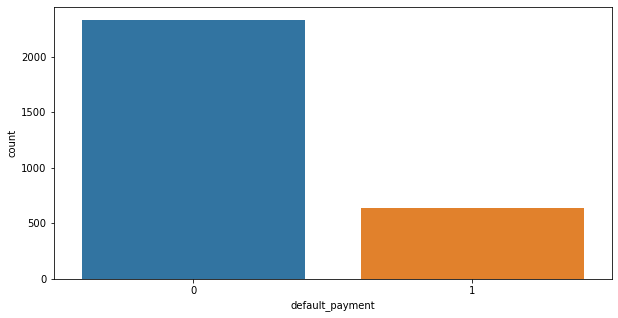

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment', data = df)
df['default_payment'].value_counts()

Based on the plot that is showing the graphic of comparison between total data of both classes, we can tell that we have imbalanced dataset.

---

#### Plotting Categorical Features

In [24]:
cat_features = ['sex', 'education_level', 'marital_status']

I defined categorical columns from the dataset which are sex, education_level and marital_status columns as cat_features

In [25]:
df_copy = df.copy()
df_cat = df_copy[cat_features]
df_cat['default_payment'] = df_copy['default_payment']

In [26]:
df_cat.replace({'sex': {1 : 'male', 2 : 'female'}, 'education_level' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'marital_status' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

I rename the value in sex and education_level columns from number type to string, so it's going to be easier for me to analyze the plotting that I'm going to make.

In [27]:
for col in ['sex', 'education_level', 'marital_status' ]:
    df_cat[col] = df_cat[col].astype('category')

I also changed the datatype to category to make it easier to differentiate.

<Figure size 720x360 with 0 Axes>

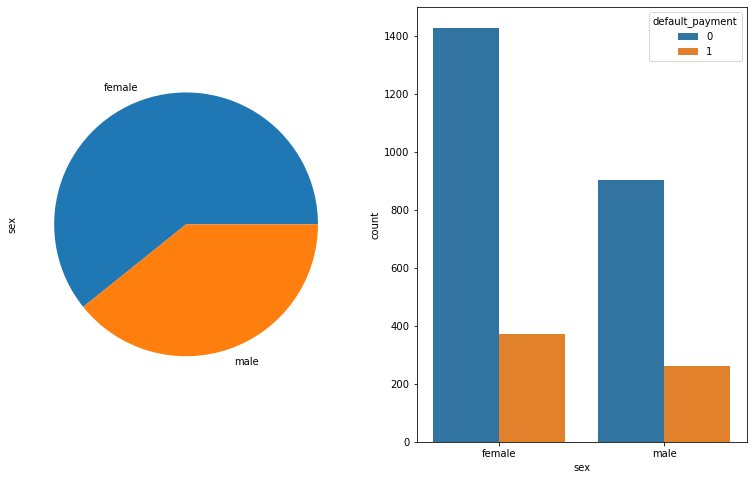

<Figure size 720x360 with 0 Axes>

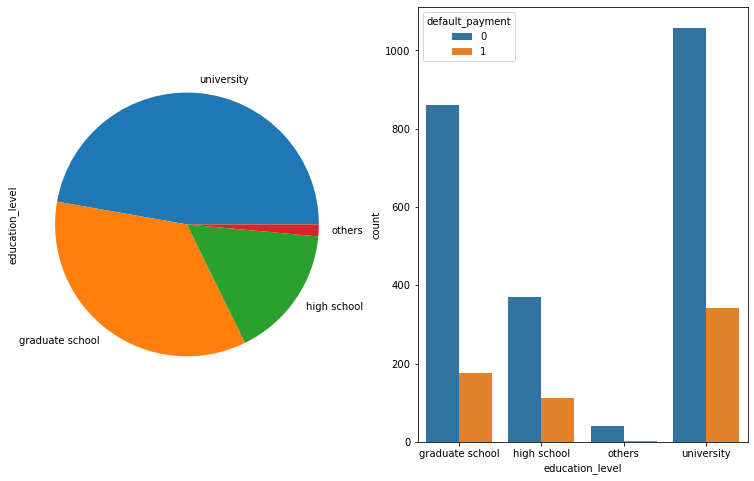

<Figure size 720x360 with 0 Axes>

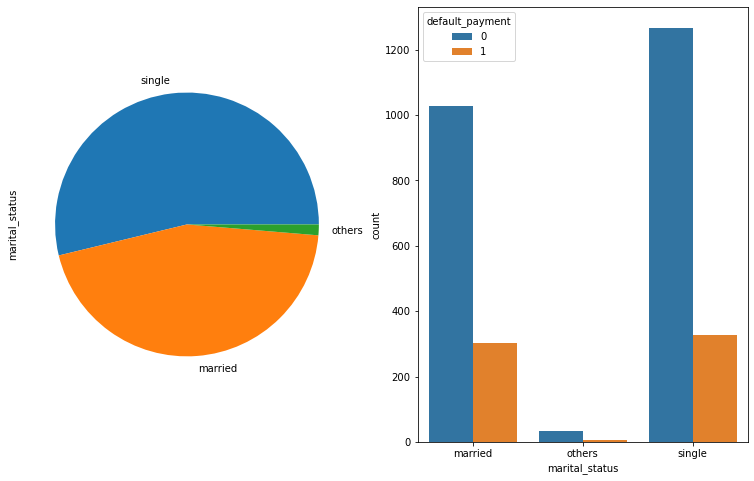

In [28]:
for col in cat_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df_cat[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'default_payment', data = df_cat)

After done a few observation by displaying countplot chart from categorical columns towards default_payment value, we can see that:
- Credit card owner dominated by female. So it's understandable if the proportional value of female is higher than male.
- The highest total number based on the education level is university people, so that they have the highest proportional value compared to others which has more than a thousand people per-class. So it means, technically, all value has the same proportion towards class 0 and class 1 in default_payment.
- People with marital_status single has the most number. But the difference of total between single people and the married one is not significant, it means that both category is equal towards default_payment. 


## v. Data Preprocessing

### Splitting Dataset

#### Define Data Inference

In [29]:
df_inf = df.sample(5, random_state=24)
df_inf

,limit_balance,sex,education_level,marital_status,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,...,pay_amt_4,pay_amt_5,pay_amt_6,default_payment,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
2065,20000,1,2,2,27,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2405,80000,1,1,2,29,31637,27137,25986,23496,23601,...,2000,2000,2000,0,0,0,0,0,0,0
2322,30000,2,3,2,28,25354,24826,25412,21658,980,...,1000,55,0,0,0,0,0,0,0,0
1490,620000,2,1,2,38,12136,7938,620,16022,2581,...,2856,4197,920,0,0,0,0,0,0,0
2648,120000,2,2,1,28,60188,58467,59760,60990,61960,...,3000,5000,0,1,1,2,0,0,0,0


Define the data inference by taking 5 rows of data from the dataset. 

In [30]:
df.drop(df_inf.index, inplace=True)

After define the data inference, the next step is to drop the data inference from dataset.

In [31]:
df.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

#### Define Features and Target

In [32]:
x = df.drop('default_payment', axis=1)
y = df['default_payment']

x.head(2)

,limit_balance,sex,education_level,marital_status,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,...,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,50000,1,3,3,50,45771,23343,0,3400,2769,...,3400,2769,1700,0,0,0,0,0,0,0
1,200000,2,3,3,45,399,2430,0,399,1396,...,399,1396,0,0,0,0,0,0,0,0


After done doing EDA and changed some datas. We split the data to define which columns that is going to be used as features and which columns that is going to be used as target. In this case, I use default_payment as the target.

#### Split the Train-set - Test-set Data

In [33]:
#Split between Train-Set and Test-Set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

print("Train Size : ", x_train.shape)
print("Test Size : ", x_test.shape)

Train Size :  (2367, 23)
Test Size :  (592, 23)


After defined the columns usage on features and target, the next step is splitting the data to divide train set and test set data. I use 80% data as train set data and 20% data as test set data. And got train shape with total 2367 data, and test shape with total 592 data.

In [34]:
df_eda = pd.concat([x_train, y_train], axis=1)
df_eda.shape

(2367, 24)

Before analyzing to the next step and handing the train set. I define a variable of concatenate between x_train and y_train for better convenience.

In [35]:
#Cardinality Check

print('Shape of Dataset : ', df_eda.shape)
print('')

for col in df_eda.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df_eda[col].nunique())
  print('')

Shape of Dataset :  (2367, 24)

Col :  limit_balance
Length Unique Value :  56

Col :  sex
Length Unique Value :  2

Col :  education_level
Length Unique Value :  4

Col :  marital_status
Length Unique Value :  3

Col :  age
Length Unique Value :  48

Col :  bill_amt_1
Length Unique Value :  2114

Col :  bill_amt_2
Length Unique Value :  2070

Col :  bill_amt_3
Length Unique Value :  2042

Col :  bill_amt_4
Length Unique Value :  2010

Col :  bill_amt_5
Length Unique Value :  1990

Col :  bill_amt_6
Length Unique Value :  1965

Col :  pay_amt_1
Length Unique Value :  1153

Col :  pay_amt_2
Length Unique Value :  1110

Col :  pay_amt_3
Length Unique Value :  1054

Col :  pay_amt_4
Length Unique Value :  988

Col :  pay_amt_5
Length Unique Value :  980

Col :  pay_amt_6
Length Unique Value :  954

Col :  pay_1
Length Unique Value :  4

Col :  pay_2
Length Unique Value :  4

Col :  pay_3
Length Unique Value :  3

Col :  pay_4
Length Unique Value :  3

Col :  pay_5
Length Unique Value :  3

By looking at the amount of total unique value, we can tell that columns that have more than 5 unique value is numerical columns and columns that equal and less than equal 5 is categorical columns.

In this data, we can see that there are 10 categorical columns and 14 numerical columns.

##### Splitting Numerical Columns and Categorical Columns

In [36]:
num_col = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_col = ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment']

After decided which columns is going to be used as numerical and categorical, the next step is splitting it into two different variables. In here, I use num_col as numerical columns, and cat_col as categorical columns.

#### Categorical Features

In this part, I want to analyze the categorical features to identify which columns are the best to use. 

In [37]:
data_cat = df_eda[cat_col]
data_cat.head()

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
1386,2,1,2,0,0,0,0,0,0,0
40,1,1,1,2,0,0,0,0,0,1
743,2,2,2,0,0,2,2,0,0,0
2001,2,1,2,3,2,2,3,3,3,1
2143,1,4,2,0,0,0,0,0,0,0


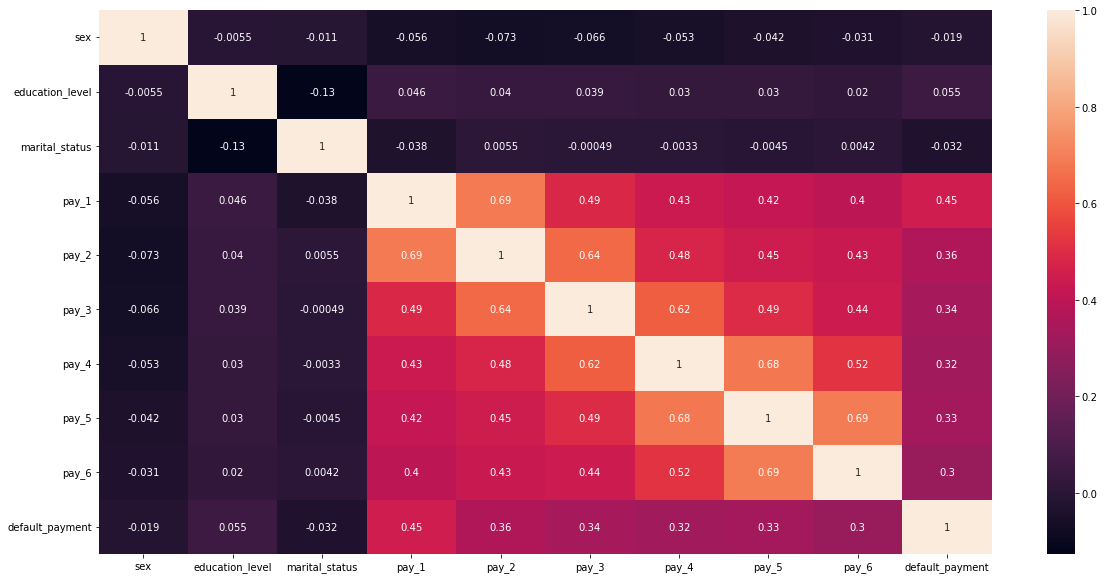

In [38]:
fig,ax = plt.subplots(figsize=[20,10])

corr = data_cat.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

Based on the heatmap plot above, we can see that columns that have correlation with default_payment are pay_1, pay_2, pay_3, pay_4, pay_5, pay_6. Because the correlation value from those columns are either equal or more than 0.3 while other columns are less than 0.1. So I will use those features which have correlation equal and more than 0.3.

After deciding which features is going to be used, the next step is checking the collinearity value between those columns. In case there are multicollinearities.

#### VIF

In [39]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [40]:
X = data_cat.iloc[:,3:9]
calc_vif(X)

,variables,VIF
0,pay_1,2.319504
1,pay_2,2.914842
2,pay_3,2.512243
3,pay_4,2.649283
4,pay_5,2.966055
5,pay_6,2.236091


Based on the multicollinearity value using VIF method above, we can say that each feature does not have correlation with one another. It means that we can use these columns for further analysis as cat_col_final.

In [41]:
cat_col_final = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_payment']
df_eda[cat_col_final].head(3)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
1386,0,0,0,0,0,0,0
40,2,0,0,0,0,0,1
743,0,0,2,2,0,0,0


#### Numerical Features

In [42]:
df_eda[num_col].head()

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1386,250000,33,16317,0,0,188841,194321,198156,0,0,188841,8500,8000,7080
40,220000,48,210380,213522,201852,169115,172169,162402,10000,9020,6000,5500,6000,5500
743,140000,36,134783,142708,143475,136331,135778,135910,12800,5000,0,5100,5000,5000
2001,10000,23,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0
2143,60000,23,5363,262,-144,450,202,196,1000,0,1000,0,400,300


#### Outlier Handling

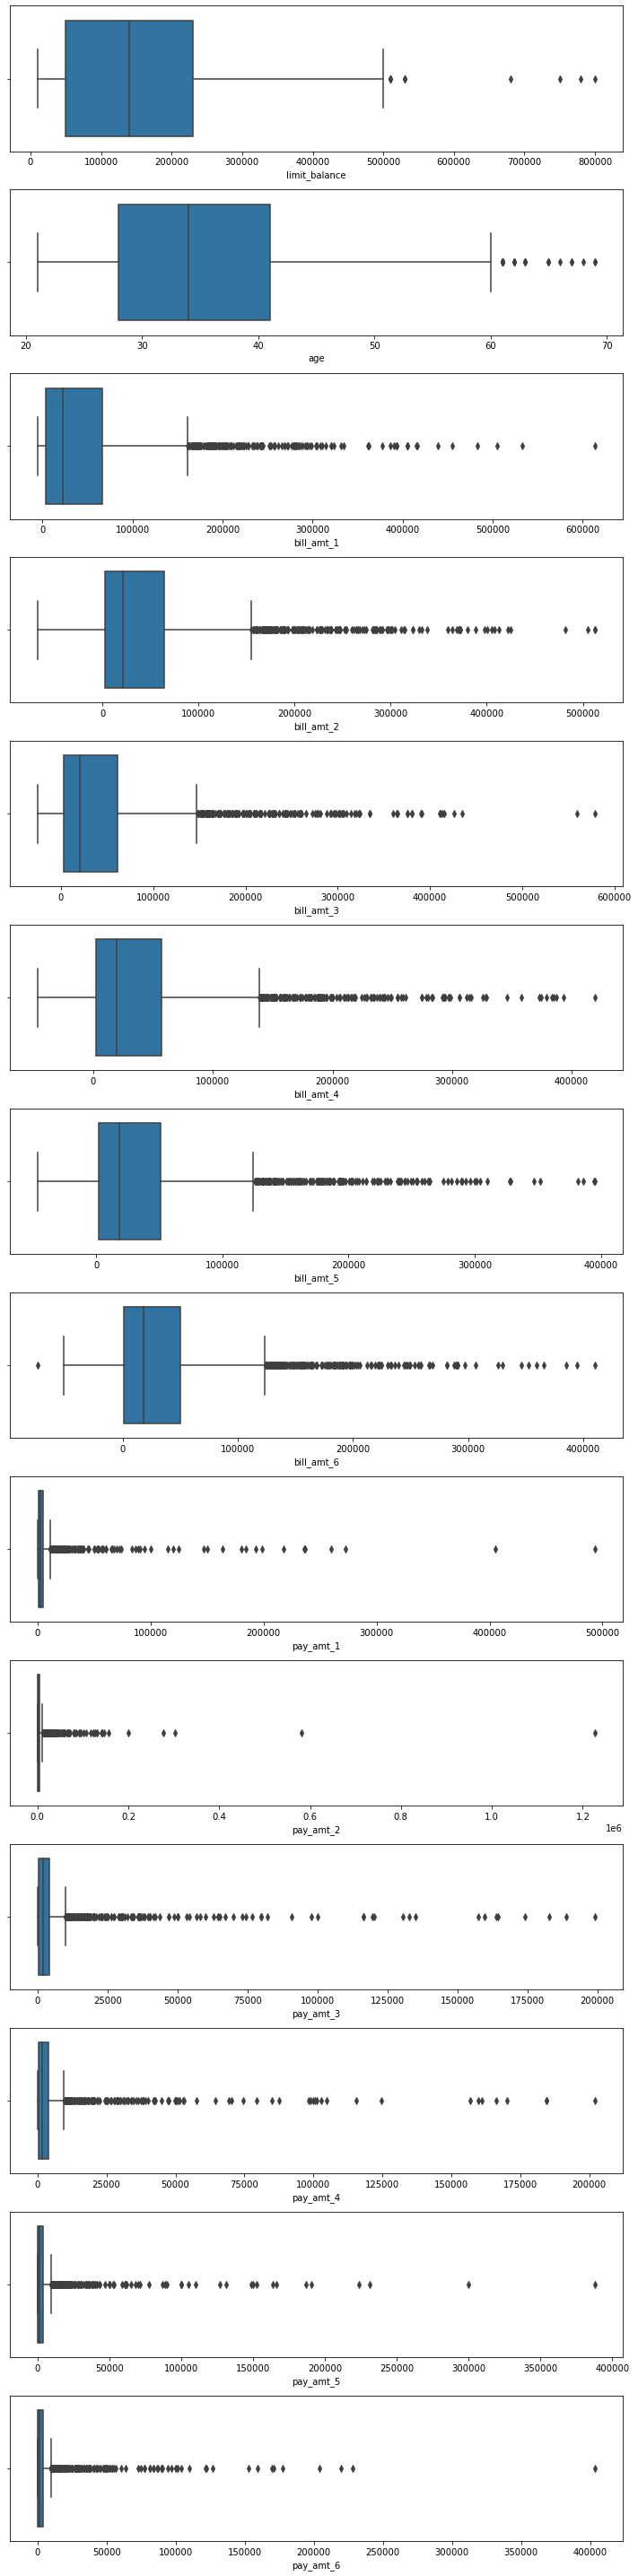

In [43]:
num_col = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

fig, ax = plt.subplots(nrows=14, figsize=(10,40))
ax = ax.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(df_eda[col], ax=ax[i])
plt.tight_layout()

In [44]:
wins = Winsorizer(capping_method='iqr', tail='right', fold=1.5, variables=['limit_balance','age'])

df_eda_handled = wins.fit_transform(df_eda)

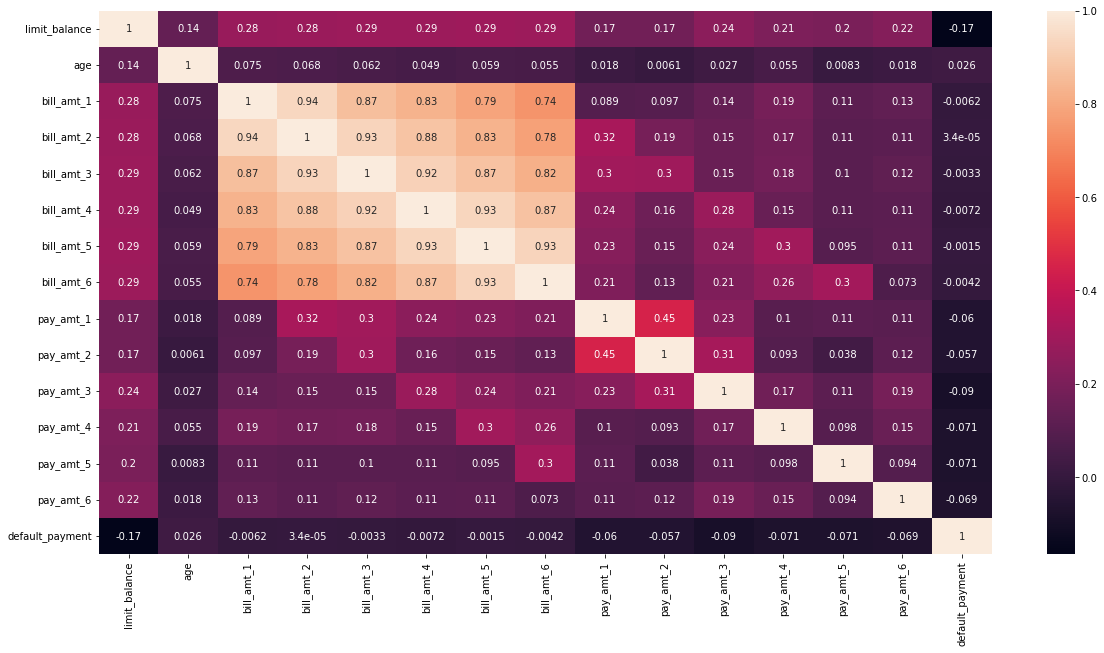

In [45]:
num_col = ['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3'
            ,'pay_amt_4','pay_amt_5','pay_amt_6','default_payment']
fig,ax = plt.subplots(figsize=[20,10])
corr = df_eda_handled[num_col].corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

After displaying the correlation value from each numerical columns, I decide to just take the limit_balance column, because that is the only column that has better correlation value towards default_payment compared to any other columns.

In [46]:
num_col_final = ['limit_balance']

So after deciding which column is going to be used, I defined a variable to save that column.

In [47]:
df_final = num_col_final + cat_col_final
df_eda_handled = df_eda_handled[df_final]
df_eda_handled

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
1386,250000.0,0,0,0,0,0,0,0
40,220000.0,2,0,0,0,0,0,1
743,140000.0,0,0,2,2,0,0,0
2001,10000.0,3,2,2,3,3,3,1
2143,60000.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2193,30000.0,0,0,0,0,0,0,0
343,80000.0,0,0,0,0,0,0,0
2240,70000.0,0,0,0,0,0,0,0
899,110000.0,0,0,0,0,0,0,1


#### Scaling

After decide which features that is going to be used, the next step is scaling the numerical columns.

In [48]:
num_col_final = ['limit_balance']
scaler = MinMaxScaler()

df_eda_handled[num_col_final] = scaler.fit_transform(df_eda_handled[num_col_final])
df_eda_handled

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
1386,0.489796,0,0,0,0,0,0,0
40,0.428571,2,0,0,0,0,0,1
743,0.265306,0,0,2,2,0,0,0
2001,0.000000,3,2,2,3,3,3,1
2143,0.102041,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2193,0.040816,0,0,0,0,0,0,0
343,0.142857,0,0,0,0,0,0,0
2240,0.122449,0,0,0,0,0,0,0
899,0.204082,0,0,0,0,0,0,1


---

After doing analysis and observation on data train set. Now it's the time to do the same thing on data test set.

In [49]:
test_data = pd.concat([x_test, y_test], axis=1)
test_data.head()

,limit_balance,sex,education_level,marital_status,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,...,pay_amt_4,pay_amt_5,pay_amt_6,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
502,350000,1,1,1,30,51672,31250,29178,29180,52550,...,32244,40218,112406,0,0,0,0,0,0,0
2861,50000,1,2,1,48,79262,40931,40892,41612,18825,...,10000,1000,700,2,0,0,0,0,0,1
1711,380000,1,1,1,52,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2144,240000,2,1,2,25,0,587,0,2417,0,...,0,0,7642,1,0,0,0,0,0,0
2462,80000,1,1,1,46,48967,49850,50767,45721,49006,...,4000,8697,0,0,0,0,0,0,0,0


#### Scaling

In [50]:
test_data = test_data[df_final]
test_data.head(2)

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
502,350000,0,0,0,0,0,0,0
2861,50000,2,0,0,0,0,0,1


In [51]:
test_data[num_col_final] = scaler.transform(test_data[num_col_final])
test_data

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
502,0.693878,0,0,0,0,0,0,0
2861,0.081633,2,0,0,0,0,0,1
1711,0.755102,1,0,0,0,0,0,0
2144,0.469388,1,0,0,0,0,0,0
2462,0.142857,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2150,0.020408,0,0,0,0,0,0,0
31,0.122449,0,0,0,0,0,0,0
2887,0.326531,0,0,0,0,0,0,0
2943,0.285714,0,0,0,0,0,0,0


In [52]:
x_train = df_eda_handled.drop('default_payment',axis=1).copy()
y_train = df_eda_handled['default_payment']

x_test = test_data.drop('default_payment',axis=1).copy()
y_test = test_data['default_payment']

## vi. Model Definition

After we got the fixed and handled columns, now the next step is to define variables for each models.

In [53]:
#Logistic Regression
log_model = LogisticRegression()

In [54]:
#SVC
svc_model = SVC()

In [55]:
#Decision Tree
dt_model = DecisionTreeClassifier()

In [56]:
#Random Forest
rf_model = RandomForestClassifier()

In [57]:
#K-Nearest Neighbors
knn_model = KNeighborsClassifier()

In [58]:
#Gaussian Naive Bayes
nb_model = GaussianNB()

In [59]:
#AdaBoost Classifier
ab_model = AdaBoostClassifier()

## vii. Model Training

After done the model definition, now is the model training step which help identify and learn good values for all attributes involved.

In [60]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [61]:
svc_model.fit(x_train, y_train)

SVC()

In [62]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [63]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [66]:
ab_model.fit(x_train, y_train)

AdaBoostClassifier()

---

#### Cross Validation

In [67]:
#Logistic Regression Cross Validation
log_cv = cross_val_score(log_model, 
                         x_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('F1 Score - All - Cross Validation  : ', log_cv)
print('F1 Score - Mean - Cross Validation : ', log_cv.mean())
print('F1 Score - Std - Cross Validation  : ', log_cv.std())

F1 Score - All - Cross Validation  :  [0.84283904 0.83396705 0.83143219]
F1 Score - Mean - Cross Validation :  0.8360794254330375
F1 Score - Std - Cross Validation  :  0.004890509887110357


In [68]:
#SVC Cross Validation
svc_cv = cross_val_score(svc_model, 
                         x_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('F1 Score - All - Cross Validation  : ', svc_cv)
print('F1 Score - Mean - Cross Validation : ', svc_cv.mean())
print('F1 Score - Std - Cross Validation  : ', svc_cv.std())

F1 Score - All - Cross Validation  :  [0.8365019  0.81875792 0.83143219]
F1 Score - Mean - Cross Validation :  0.8288973384030419
F1 Score - Std - Cross Validation  :  0.00746240884353852


In [69]:
#Decision Tree Cross Validation
dt_cv = cross_val_score(dt_model, 
                         x_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('F1 Score - All - Cross Validation  : ', dt_cv)
print('F1 Score - Mean - Cross Validation : ', dt_cv.mean())
print('F1 Score - Std - Cross Validation  : ', dt_cv.std())

F1 Score - All - Cross Validation  :  [0.82002535 0.80481622 0.81622307]
F1 Score - Mean - Cross Validation :  0.8136882129277566
F1 Score - Std - Cross Validation  :  0.006462635631930023


In [70]:
#Random Forest Cross Validation
rf_cv = cross_val_score(rf_model, 
                         x_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('F1 Score - All - Cross Validation  : ', rf_cv)
print('F1 Score - Mean - Cross Validation : ', rf_cv.mean())
print('F1 Score - Std - Cross Validation  : ', rf_cv.std())

F1 Score - All - Cross Validation  :  [0.81368821 0.81115336 0.81622307]
F1 Score - Mean - Cross Validation :  0.8136882129277566
F1 Score - Std - Cross Validation  :  0.0020696998249118406


In [71]:
#KNeighbor Classifier Cross Validation
knn_cv = cross_val_score(knn_model, 
                         x_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('F1 Score - All - Cross Validation  : ', knn_cv)
print('F1 Score - Mean - Cross Validation : ', knn_cv.mean())
print('F1 Score - Std - Cross Validation  : ', knn_cv.std())

F1 Score - All - Cross Validation  :  [0.82129278 0.81875792 0.81875792]
F1 Score - Mean - Cross Validation :  0.8196028728348121
F1 Score - Std - Cross Validation  :  0.0011949417510545726


In [72]:
#GaussianNB Cross Validation
nb_cv = cross_val_score(nb_model, 
                         x_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('F1 Score - All - Cross Validation  : ', nb_cv)
print('F1 Score - Mean - Cross Validation : ', nb_cv.mean())
print('F1 Score - Std - Cross Validation  : ', nb_cv.std())

F1 Score - All - Cross Validation  :  [0.81115336 0.81242079 0.77820025]
F1 Score - Mean - Cross Validation :  0.8005914659907055
F1 Score - Std - Cross Validation  :  0.015841430721802028


In [73]:
#AdaBoost Classifier Cross Validation
ab_cv = cross_val_score(ab_model, 
                         x_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('F1 Score - All - Cross Validation  : ', ab_cv)
print('F1 Score - Mean - Cross Validation : ', ab_cv.mean())
print('F1 Score - Std - Cross Validation  : ', ab_cv.std())

F1 Score - All - Cross Validation  :  [0.83903676 0.83143219 0.83396705]
F1 Score - Mean - Cross Validation :  0.8348119983100971
F1 Score - Std - Cross Validation  :  0.003161518704498502


#### Hyperparameter Tuning

In [74]:
params = [
    {'n_estimators': [100,150,200,300],                                           
     'learning_rate': [0.01,0.1,1],
     'random_state':[1,10,100],
     'algorithm':['SAMME', 'SAMME.R'] }            
  ]

grid_search = GridSearchCV(ab_model, params, cv=3,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(x_train, y_train)

For the tuning, I use AdaBoost Classifier as the model, and Recall as the scoring.

In [ ]:
pd.DataFrame(grid_search.cv_results_).shape

(72, 20)

In [ ]:
grid_search.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 0.01,
 'n_estimators': 150,
 'random_state': 1}

In [ ]:
grid_search.best_score_

0.39973624180211004

In [ ]:
grid_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01, n_estimators=150,
                   random_state=1)

Based on the result above, AdaBoost Classifier is the best estimator to use in this model.

In [ ]:
ab_model_final = grid_search.best_estimator_

I defined the best estimator as ab_model which means AdaBoost Model.

## viii. Model Evaluation

In [ ]:
y_pred_train_before = ab_model.predict(x_train)
y_pred_test_before = ab_model.predict(x_test)
y_pred_train = ab_model_final.predict(x_train)
y_pred_test = ab_model_final.predict(x_test)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train,y_pred_train_before))
print("="*10,"TEST","="*10)
print(classification_report(y_test,y_pred_test_before))
print("="*10,"TRAINING","="*10)
print(classification_report(y_train,y_pred_train))
print("="*10,"TEST","="*10)
print(classification_report(y_test,y_pred_test))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1864
           1       0.70      0.41      0.51       503

    accuracy                           0.84      2367
   macro avg       0.78      0.68      0.71      2367
weighted avg       0.82      0.84      0.82      2367

========== TEST ==========
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       462
           1       0.74      0.39      0.51       130

    accuracy                           0.84       592
   macro avg       0.79      0.68      0.71       592
weighted avg       0.82      0.84      0.82       592

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1864
           1       0.71      0.41      0.52       503

    accuracy                           0.84      2367
   macro avg       0.78      0.68      

As we can see from the classification report above. There is a slightly increasing in recall value from class 1 from test set data. For the train set recall value is 0.39 and the recall value for test set is 0.40.

## ix. Model Inference

In [ ]:
df_inf

,limit_balance,sex,education_level,marital_status,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,...,pay_amt_4,pay_amt_5,pay_amt_6,default_payment,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,20000,1,2,2,27,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,80000,1,1,2,29,31637,27137,25986,23496,23601,...,2000,2000,2000,0,0,0,0,0,0,0
2,30000,2,3,2,28,25354,24826,25412,21658,980,...,1000,55,0,0,0,0,0,0,0,0
3,620000,2,1,2,38,12136,7938,620,16022,2581,...,2856,4197,920,0,0,0,0,0,0,0
4,120000,2,2,1,28,60188,58467,59760,60990,61960,...,3000,5000,0,1,1,2,0,0,0,0


In [ ]:
df_inf = df_inf[df_final]
df_inf

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
0,20000,1,0,0,0,0,0,1
1,80000,0,0,0,0,0,0,0
2,30000,0,0,0,0,0,0,0
3,620000,0,0,0,0,0,0,0
4,120000,1,2,0,0,0,0,1


#### Scaling

In [ ]:
df_inf[num_col_final] = scaler.transform(df_inf[num_col_final])
df_inf

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
0,0.020408,1,0,0,0,0,0,1
1,0.142857,0,0,0,0,0,0,0
2,0.040816,0,0,0,0,0,0,0
3,1.244898,0,0,0,0,0,0,0
4,0.224490,1,2,0,0,0,0,1


In [ ]:
x_inf = df_inf.drop('default_payment', axis=1).copy()

In [ ]:
y_pred_inf = ab_model_final.predict(x_inf)
y_pred_inf

array([0, 0, 0, 0, 0], dtype=int64)

In [ ]:
df_inf.shape

(5, 8)

## x. Conclusion

Based on analysis and observations that we just done, it can be conclude that:
- There are 24 columns that is used. which are 10 categorical columns, and 14 numerical columns.
- Some of the data doesn't match the column descriptions, so we had to change some value so the data can be analyzed clearly. The action that I took was renaming two columns, such as changing pay_0 columns to 'pay_1', because from the raw dataset, after pay_0 column, the next one is pay_2. So to make it easier, I changed it to pay_1. And I also changed the `default_payment_next_month` column to `default_payment` so it won't be too long and easier to analyze.
- I also changed and add some values together to shorten the cardinality of the columns, such as education_level, marital_status, and repayment status (pay_1 until pay_6) columns.
- The data target is imbalanced, where class 0 has 2329 total value, and class 1 has 635 total value.
- Credit card owner is dominated by female than male, with the total number of female is 1789, while the total number of male is 1161.
- Based on the education_level, university category has the most number than other category.
- Some categorical columns don't have correlation to the target, such as `sex`, `education_level` and `marital_status`, so that those features is not going to be used for the next analysis.
- There are no multicollinearity between the columns on the repayment status which are pay_1, pay_2, pay_3, pay_4, pay_5, pay_6.
- On numerical features, almost all the feature don't have correlation to the target except limit_balance. So, the only numerical feature that is going to be used is `limit_balance` column.
- The total final features is 7 columns. Which are `limit_balance`, `pay_1`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6`.
- There are 7 algorithms that is used in this case, which are `Logistic Regression`, `SVC`, `Decision Tree`, `Random Forest`, `K-Nearest Neighbor`, `Gaussian Naive Bayes` and `AdaBoost Classifier`.
- After done Cross Validation from each algorithms and done doing hyperparameter tuning, we got AdaBoost Classifier as the best estimator.
- From the classification report, we got the Recall value for train set is 0.39, and from the test set is 0.40. The increase is not significant, it might be caused by the imbalanced target data.



### CONCEPTUAL PROBLEMS

`1. What is the function of parameter criterion in Decision Tree? Explain one of criterion that you understand!`
> Criterion determines how the impurity of a split will be measured. The default value is "gini", but you can also use "entropy" as a metric for impurity.

I will explain about entropy as it's one of criterion.

>Entropy is a measure of the disorder of a system. In the case of data science, it's the measure of impurity in a split. Splitting with less entropy ensures optimum results. Splitting with less entropy ensures optimum results. Entropy ranges from 0 to 1. If entropy is 0, consider it as a pure sub-tree and entropy becomes 1 if all labels are equally distributed in a leaf

---

`2. What is the function of pruning in Tree model?`
>Decision Trees are prone to over-fitting. A decision tree will always overfit the training data if we allow it to grow to its max depth, so `Pruning` comes in handy. Pruning is a technique that is used to reduce overfitting. Pruning also simplifies a decision tree by removing the weakest rules. `Pruning` is categorized into two segments :

#### Pre - Pruning
- Pre - Pruning stops the tree before it has completed classifying the training set 

#### Post - Pruning
- Post - Pruning allows the tree to classify the training set perfectly and then prunes the tree.

Pruning begins with an unpruned tree, takes a sequence of pruned trees and lastly finding the best one through cross validation. There are somethings to take account when using pruning on decision tree, some of them are :

- The subtree is optimal, which means that the subtree that has the highest cross validated accuracy or other parameters

- The search for the optimal subtree should be computationally tractable.

---

`3. How to determine an optimal K value in KNN?`
>Using K-Nearest Neighbour, we predict the category of the test point from the available class labels by finding the distance between the test point and trained k nearest feature values.

#### How to select the optimal K value?
- There are no pre-defined statistical methods to find the most favorable value of K.
- Initialize a random K value and start computing.
- Choosing a small value of K leads to unstable decision boundaries.
- The substantial K value is better for classification as it leads to smoothening the decision boundaries.
- Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.

---

`4. Explain what do you know about Cross Validation!`
>Cross-validation is a procedure to evaluate the performance of learning models. Datasets are typically split in a random or stratified strategy. The splitting technique can be varied and chosen based on the data’s size and the ultimate objective. Also, the computational cost plays a role in implementing the CV technique. Using cross-validation, there are high chances that we can detect over-fitting with ease. To do CV, we have to make a fixed number of folds (partition) of the data and then doing an analysis on each fold. Then averaging the overall error estimate.

---

`5. Explain what do you know about Accuracy, Precision, Recall, F1 Score!`
>Accuracy is a number of correctly predicted data points out of all the data.

#### Accuracy = (TP + TN) /(TP + TN + FP + FN)

>Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

#### Precision = TP/(TP + FP)

>Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

#### Recall = TP/(TP+FN)

>The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation.

#### F1 Score = 2*(Recall * Precision) / (Recall + Precision)